In [63]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA


data_df = pd.read_csv('../Data/data.csv') #data is n x p matrix
labels_df = pd.read_csv('../Data/labels.csv')

data = np.array(data_df)[:,1:]
labels = np.array(labels_df)

In [98]:
data_df.head()

Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0   sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1   sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2   sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3   sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4   sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   

     gene_6    gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  \
0  7.175175  0.591871     0.0  ...    4.926711    8.210257    9.723516   
1  6.816049  0.000000     0.0  ...    4.593372    7.323865    9.740931   
2  6.972130  0.452595     0.0  ...    5.125213    8.127123   10.908640   
3  7.843375  0.434882     0.0  ...    6.076566    8.792959   10.141520   
4  6.566967  0.360982     0.0  ...    5.996032    8.891425   10.373790   

   gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
0    7.220030    9.119813   12.003135    9.650743    8.921326    5.286759   
1    6.256586    8.381612   12.674552   10.517059    9.397854    2.094168   
2    5.401607    9.911597    9.045255    9.788359   10.090470    1.683023   
3    8.942805    9.601208   11.392682    9.694814    9.684365    3.292001   
4    7.181162    9.846910   11.922439    9.217749    9.461191    5.110372   

   gene_20530  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  

[5 rows x 20532 columns]

0.01813907534512128

In [50]:
print('data shape: '+str(data_df.shape))

data shape: (801, 20532)


In [116]:
from sklearn import preprocessing

In [122]:
data_scaled = StandardScaler().fit_transform(data)


/Users/leekho/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/leekho/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.018704410652656978

In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def reg_PCA(X,k_comp): 
#     """
#     function takes an n x p feature matrix
#     returns two arrays:
#     - array with percentage of explained variance in first k principal directions (k_comp x 1)
#     - array with principal directions (k_comp x p)
#     """
#     M = X.T @ X
#     eigvals, prin_dirs = np.linalg.eigh(M)
    
#     return eigvals, prin_dirs
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=k_comp)
    pca.fit(X)
    PEVs = pca.explained_variance_ratio_
    prin_comp = pca.components_
    EVs = pca.explained_variance_
    
    
    return PEVs, prin_comp, EVs

In [148]:
PCA_PEV, PCA_PC, PCA_EV = reg_PCA(data,1)

PCA_EV

/Users/leekho/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/leekho/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([2138.4510195])

In [149]:
PCA_PC@((1/801)*(data_scaled.T @ data_scaled))@PCA_PC.T

array([[2135.78129289]])

In [164]:
np.abs(PCA_PC)



for i, value in enumerate(np.abs(list(PCA_PC[0]))):
    print(i,value)
    
    

0 0.018624003696724185
1 0.01859215958506322
2 0.0181897232339136
3 0.018002253810411307
4 0.017933698058893173
5 0.01751624790429036
6 0.01748171990456782
7 0.017284519943041147
8 0.017250122198882726
9 0.017200370812175337
10 0.017175923482978014
11 0.01710066293095248
12 0.01707330912145282
13 0.01698733502693162
14 0.016979039989693072
15 0.016914587075764466
16 0.01690173155920814
17 0.016787515181577114
18 0.01675748582283165
19 0.016720189869204437
20 0.016705322885614653
21 0.016663306936498732
22 0.016659680479801965
23 0.01657955308446879
24 0.01656645424880509
25 0.01655697695131021
26 0.016440518838649328
27 0.01640626879902847
28 0.016405225079775185
29 0.016377209516093245
30 0.016375269819498526
31 0.01633206807559413
32 0.016286651266562393
33 0.01628255379485247
34 0.016279107841343215
35 0.016276563062725836
36 0.01616907616332547
37 0.01615798936287943
38 0.016005895134434275
39 0.015989682540417605
40 0.01598512533035805
41 0.01597113799191988
42 0.01595109956385943

824 0.011414284469047504
825 0.011413997232412104
826 0.011413324000107625
827 0.011410395292625832
828 0.011407471042567964
829 0.011401474762373052
830 0.011400481852759244
831 0.011399887562073576
832 0.01139020144375226
833 0.01138970351400112
834 0.011387790046330257
835 0.01138054356579064
836 0.011379883479566668
837 0.011378403476150848
838 0.011375957543848054
839 0.011368205288099498
840 0.011363132062804879
841 0.011358605464917813
842 0.01135634127075546
843 0.011355976722633151
844 0.011354653195474216
845 0.01135364172794815
846 0.01134472407306718
847 0.011344515257972195
848 0.011341332901033407
849 0.011341181110092016
850 0.011337747227443452
851 0.011337448749953483
852 0.011335087284563006
853 0.01133348021518257
854 0.011332484686396489
855 0.011328709106915857
856 0.011327718261555637
857 0.011325161291356911
858 0.011323944542633062
859 0.011322978202590067
860 0.011315942345602561
861 0.011312943480838304
862 0.011291869361639473
863 0.01127565993658589
864 0.01

1573 0.009466125158097192
1574 0.00946467576372016
1575 0.009462204744474033
1576 0.009458448119023166
1577 0.009458230906982603
1578 0.009457593189184078
1579 0.009456738344509795
1580 0.009456273431577443
1581 0.00945335237375293
1582 0.009451789194584323
1583 0.009448019536609946
1584 0.009443273487564508
1585 0.009439761467456011
1586 0.00943920748255068
1587 0.009436369950537992
1588 0.009434404335728454
1589 0.009427377851149351
1590 0.009427001185849592
1591 0.00942361780484369
1592 0.009421701794057411
1593 0.009421289843020953
1594 0.009417338608244848
1595 0.009416698106562897
1596 0.009415128834791146
1597 0.009410657664022753
1598 0.009410310358704987
1599 0.00940896709602514
1600 0.009405756874623597
1601 0.009404676452883969
1602 0.00940339153565146
1603 0.009398757592988416
1604 0.00939840613291418
1605 0.009391096778953672
1606 0.009388336311394617
1607 0.009386929613804443
1608 0.009386119250357214
1609 0.00938440259361871
1610 0.009383846467144097
1611 0.0093722628360

2573 0.007581301110150391
2574 0.00758035522080461
2575 0.007578950671189554
2576 0.007578304766872466
2577 0.007577232762238231
2578 0.007576709160668941
2579 0.007576518040582256
2580 0.007575867678226635
2581 0.007565967439385306
2582 0.00756357727605975
2583 0.007562985373767307
2584 0.007560312743546734
2585 0.007558479589082812
2586 0.007557595911373252
2587 0.00755725461255404
2588 0.007556353340018469
2589 0.007547375709555904
2590 0.007546933439368981
2591 0.0075451313696903895
2592 0.007543588442438969
2593 0.0075390602262938805
2594 0.007532536634202062
2595 0.007531023978051104
2596 0.007529821774336971
2597 0.007526576172079454
2598 0.007523369861037125
2599 0.007522508551371588
2600 0.007522123592406467
2601 0.007517381002348672
2602 0.007515098290306535
2603 0.007514148508433306
2604 0.007507654946133363
2605 0.007504736799276147
2606 0.00749710236575839
2607 0.007496757548866444
2608 0.007492233313397914
2609 0.007491763274942511
2610 0.007491090520598494
2611 0.0074885

3573 0.0059856656276372445
3574 0.00597993086615714
3575 0.005975880209348663
3576 0.005973995828633757
3577 0.005972671769031015
3578 0.005970390658650787
3579 0.005969655623606059
3580 0.005969625581147706
3581 0.005966582469364146
3582 0.005963004656573558
3583 0.0059624397940633385
3584 0.00595937021551259
3585 0.005957726090068937
3586 0.005957666576284629
3587 0.005956844247920231
3588 0.00595225385383612
3589 0.005951885645507205
3590 0.005950441914357436
3591 0.005949739923216507
3592 0.005949331605267891
3593 0.005948815745331673
3594 0.005947501722325562
3595 0.005947342599849377
3596 0.005946810774130887
3597 0.005946018154498747
3598 0.005942342946567996
3599 0.005940496663851488
3600 0.005939054005302825
3601 0.005937742465651672
3602 0.005932773869210398
3603 0.005931651067666043
3604 0.005930801967299562
3605 0.005930749281104291
3606 0.005929016417776616
3607 0.005928935323337115
3608 0.005927916561765247
3609 0.0059245973811770745
3610 0.005923106004433975
3611 0.00592

4573 0.004668210189393307
4574 0.004662394235135222
4575 0.004661902162974338
4576 0.004661466398514313
4577 0.0046581739419358234
4578 0.004656637200729425
4579 0.004656591606950824
4580 0.004656505295270725
4581 0.004655992538119811
4582 0.004654625840198682
4583 0.004654416875052469
4584 0.004654109781274193
4585 0.004653314479224086
4586 0.004652670511360188
4587 0.004651631754918576
4588 0.004650122423337754
4589 0.004649674957418542
4590 0.00464666578195492
4591 0.004644691129062949
4592 0.004643515751878097
4593 0.004642816398785201
4594 0.004640224501530095
4595 0.004639335055101143
4596 0.004639198311045885
4597 0.004638503079143938
4598 0.00463805474297593
4599 0.00463708330825463
4600 0.004636891158648224
4601 0.00463371555102573
4602 0.0046305193564398954
4603 0.0046302262693824975
4604 0.004628696382829765
4605 0.004628074445527376
4606 0.004627748051149797
4607 0.004627575192748728
4608 0.004627558553849969
4609 0.004626464278988545
4610 0.004626447470678218
4611 0.004624

5572 0.0035153520571093257
5573 0.003511762529145137
5574 0.003510626779488985
5575 0.003509940385232502
5576 0.0035089842972830135
5577 0.0035058473511866356
5578 0.0035051376470710037
5579 0.0035037671314373533
5580 0.0035023235370330447
5581 0.00350069553329384
5582 0.003499721251259088
5583 0.0034996281903720496
5584 0.0034991776874199456
5585 0.0034977616011050614
5586 0.003497099443011899
5587 0.003496013153020129
5588 0.003495300201733255
5589 0.0034949884243643966
5590 0.0034925287996520377
5591 0.0034920500279230684
5592 0.0034906920056809454
5593 0.0034906863083311633
5594 0.0034903201563607185
5595 0.003489413635967982
5596 0.0034890278786478247
5597 0.0034859371131213037
5598 0.0034851649905308464
5599 0.00348419259194982
5600 0.003482003029184309
5601 0.0034815891149260294
5602 0.0034781237543130865
5603 0.0034776028595803117
5604 0.003476890818379182
5605 0.003476468005015106
5606 0.003476088531012725
5607 0.003475417448720695
5608 0.003474821896027693
5609 0.003474575353

6572 0.0025068104167670804
6573 0.002506789485001351
6574 0.0025055683283981443
6575 0.002505349162845868
6576 0.00250471993698533
6577 0.0025033884337660557
6578 0.0025029843978953
6579 0.0025027040539703795
6580 0.002501590291403541
6581 0.0025008067039602702
6582 0.0025003382188483417
6583 0.002500200196115536
6584 0.0024991286057809156
6585 0.0024975760835601866
6586 0.0024960824113628836
6587 0.0024959200315365308
6588 0.0024890356269788127
6589 0.0024867284823777724
6590 0.0024843020071215155
6591 0.0024789859780294477
6592 0.002478233547831057
6593 0.00247796534098991
6594 0.002477316296408282
6595 0.0024753814281500077
6596 0.0024728593461555417
6597 0.0024715775126548717
6598 0.0024713734327220893
6599 0.0024712791041576095
6600 0.0024708343754177896
6601 0.0024708010926569883
6602 0.0024696491154740513
6603 0.002468111189077311
6604 0.0024672909931849093
6605 0.002466509835728345
6606 0.0024651702789146713
6607 0.0024646577245036345
6608 0.002463203055540857
6609 0.0024620994

7572 0.0016162726447401558
7573 0.001615932052734507
7574 0.001614291457918498
7575 0.0016127578703357172
7576 0.0016123423319712273
7577 0.0016112029525555576
7578 0.001609993007048454
7579 0.0016097811202317113
7580 0.0016087774536590336
7581 0.0016084269935755762
7582 0.001608043979311714
7583 0.0016074483770066993
7584 0.0016068378686432277
7585 0.0016065996172637466
7586 0.0016057850326196576
7587 0.0016046776520156482
7588 0.0016019143942311489
7589 0.0016015644967869998
7590 0.0016009521262377424
7591 0.0015985936619018583
7592 0.0015980064325494734
7593 0.0015977284235832257
7594 0.001597092527483989
7595 0.001594187308464404
7596 0.0015940942740935425
7597 0.0015940365257131712
7598 0.0015936990624940137
7599 0.0015936927199364068
7600 0.0015935114436883815
7601 0.0015934348558422533
7602 0.0015932643809684428
7603 0.001592207131282253
7604 0.0015921508532273523
7605 0.0015910238049524775
7606 0.0015903217137448827
7607 0.0015899310675749649
7608 0.0015898789307673814
7609 0.0

8572 0.0008118354773995855
8573 0.0008111706090359179
8574 0.0008107497846591296
8575 0.0008104542261885665
8576 0.000809995649197482
8577 0.0008089498780960962
8578 0.0008086621997904373
8579 0.0008077678347919704
8580 0.0008051435866233831
8581 0.0008049819058359894
8582 0.0008022257627933841
8583 0.0008017745066939157
8584 0.0008007569640652119
8585 0.0007989171592391205
8586 0.0007987553188394499
8587 0.0007985596845442905
8588 0.0007984392828115509
8589 0.0007982239198337928
8590 0.0007977457740817605
8591 0.0007977348429846579
8592 0.0007940609223923889
8593 0.0007936458926148204
8594 0.0007933197334676532
8595 0.0007925180291472761
8596 0.0007917830591605162
8597 0.0007915220487918883
8598 0.000790763578513569
8599 0.0007892213329958593
8600 0.0007886547538457166
8601 0.0007884067503350692
8602 0.000788403094523571
8603 0.0007877150144262442
8604 0.0007867821730724133
8605 0.0007867297713846824
8606 0.0007866029136057872
8607 0.0007865354366763039
8608 0.0007851007944488159
8609

9571 0.00010118477922492483
9572 0.00010073228674067294
9573 0.00010038750756692519
9574 0.00010030725552587749
9575 9.98351590496883e-05
9576 9.951594834042711e-05
9577 9.795130373125533e-05
9578 9.769851045161675e-05
9579 9.693740203220173e-05
9580 9.667736224819467e-05
9581 9.426453068860296e-05
9582 9.262303282350212e-05
9583 9.127841800116515e-05
9584 9.121399119420513e-05
9585 9.049033007796428e-05
9586 9.03372899401618e-05
9587 8.61906907259762e-05
9588 8.47832289388089e-05
9589 8.410325535376398e-05
9590 8.340549174964527e-05
9591 8.207313979594703e-05
9592 8.168565256140148e-05
9593 8.040779675840493e-05
9594 7.942392125673916e-05
9595 7.929109784583901e-05
9596 7.819115337651983e-05
9597 7.656779022857672e-05
9598 7.654270442890922e-05
9599 7.593581060963421e-05
9600 7.584725608033285e-05
9601 7.558156273032454e-05
9602 7.46070743067421e-05
9603 7.403894972340335e-05
9604 7.283257023466584e-05
9605 7.19599416460103e-05
9606 7.10334257564053e-05
9607 6.993958009402034e-05
9608

10571 0.0004797231689250265
10572 0.00047990426371852154
10573 0.00048207244562746765
10574 0.00048214914486310894
10575 0.0004828770759408981
10576 0.00048334909426694494
10577 0.0004836999131207947
10578 0.000484877125624647
10579 0.00048538028041353396
10580 0.0004859591284191713
10581 0.00048608334579401425
10582 0.0004866945643041564
10583 0.0004879379003674449
10584 0.000488720395563894
10585 0.0004889155745800604
10586 0.0004912485171407423
10587 0.0004918322999334369
10588 0.0004925802219338738
10589 0.0004928931458907129
10590 0.0004935679174697083
10591 0.0004942438487518639
10592 0.0004948893342646164
10593 0.0004951874520836615
10594 0.0004953002384880282
10595 0.000499084264675893
10596 0.0004990925230093642
10597 0.0004992498981517084
10598 0.0005002755567402767
10599 0.0005008029954692698
10600 0.0005013896359236055
10601 0.0005014272785339346
10602 0.0005017268825846602
10603 0.0005020935574144931
10604 0.0005030104368716532
10605 0.0005034063943557446
10606 0.000503717

11571 0.001294028621559911
11572 0.001296226964344635
11573 0.0012966871995761682
11574 0.0012984413374552309
11575 0.0012986868164365278
11576 0.001302298382520365
11577 0.0013032854321824727
11578 0.0013040159774713649
11579 0.00130403068739576
11580 0.0013047655447524019
11581 0.001304803052020697
11582 0.0013072487683834944
11583 0.0013082883565979123
11584 0.0013093751465493202
11585 0.0013099079270710555
11586 0.001311199091726372
11587 0.0013116427071553627
11588 0.0013119109537258237
11589 0.0013127922201015914
11590 0.001312885881596782
11591 0.001314349452172648
11592 0.0013143682030057231
11593 0.0013164316000428954
11594 0.0013172711791631353
11595 0.0013203906241862585
11596 0.0013210503860087422
11597 0.0013212731933678892
11598 0.0013221830174893914
11599 0.0013232975053394196
11600 0.0013245725631708383
11601 0.0013247504477119736
11602 0.0013251651102204958
11603 0.0013261586782404892
11604 0.001327171930574832
11605 0.0013291104401214058
11606 0.0013294702914012873
11

12571 0.002230518209643109
12572 0.0022307094757274093
12573 0.0022310422163588656
12574 0.002231908874121233
12575 0.0022324680717434853
12576 0.0022357700827854367
12577 0.0022364531218654993
12578 0.0022367005168456035
12579 0.002237038690696148
12580 0.00223790821592372
12581 0.002238153822060619
12582 0.0022382685392222617
12583 0.002238749594971922
12584 0.0022396299120804463
12585 0.0022406017690392785
12586 0.0022426541329351787
12587 0.002242724017198765
12588 0.002244773915778445
12589 0.0022464068316381206
12590 0.002249407773427482
12591 0.0022497508301589702
12592 0.0022500083443897333
12593 0.002251061242046978
12594 0.00225163672640484
12595 0.0022522879454869417
12596 0.002253179266182299
12597 0.002253688939452651
12598 0.0022545056209906746
12599 0.002254980471493054
12600 0.002255219767342404
12601 0.002256174947320675
12602 0.002256382438047763
12603 0.0022587947405166672
12604 0.002259526206651635
12605 0.0022609094586136407
12606 0.0022614184562256205
12607 0.0022

13570 0.0032943720579715293
13571 0.003294793128595016
13572 0.0032962129002780055
13573 0.0032963065779673495
13574 0.0032976505897938583
13575 0.003298144673097048
13576 0.0032990682161797256
13577 0.003299785575807765
13578 0.0033011346045339496
13579 0.003301139933292106
13580 0.003301345187836866
13581 0.0033033370838240097
13582 0.0033037437045558287
13583 0.0033041113763072985
13584 0.003304482418294895
13585 0.0033047616776827548
13586 0.003304922509707521
13587 0.003304954860952453
13588 0.0033073305727414778
13589 0.0033078907300789044
13590 0.0033107253513175857
13591 0.003310934052279269
13592 0.0033137417615148137
13593 0.0033155143696132166
13594 0.0033158276733685254
13595 0.003316714487437731
13596 0.003318338748278319
13597 0.0033201982377105204
13598 0.0033209450924157843
13599 0.0033220245140544377
13600 0.0033235406603675664
13601 0.003324536111254532
13602 0.0033257053207572016
13603 0.003326795216241575
13604 0.003327447597082687
13605 0.003331723520148874
13606 0

14570 0.004492377031668083
14571 0.004492381092472454
14572 0.0044927793339452505
14573 0.0044935604186006
14574 0.004494058234383136
14575 0.004494187029748039
14576 0.004494882766837028
14577 0.004495353762668141
14578 0.0044954776090302614
14579 0.004496958597862005
14580 0.004497568352748764
14581 0.004498135777709802
14582 0.004498451523659424
14583 0.004499113045571154
14584 0.00449934522953299
14585 0.004501202590819027
14586 0.004504396015734165
14587 0.004505046292004899
14588 0.004507637504657843
14589 0.004508872368636574
14590 0.004510869403022957
14591 0.00451087500269134
14592 0.004511058712915081
14593 0.004511081775019588
14594 0.004511114724872781
14595 0.00451117476811467
14596 0.004515308795478461
14597 0.004515750866046291
14598 0.004516421056777914
14599 0.004518784921132571
14600 0.004521775607954394
14601 0.004522358670356624
14602 0.004525401236357244
14603 0.004526828273220306
14604 0.004527138680489169
14605 0.004527219670396866
14606 0.00452960409441877
14607

15570 0.0057256335290335435
15571 0.0057258585778800185
15572 0.005726860744227333
15573 0.005727106808379106
15574 0.00572738533703817
15575 0.005729455469934855
15576 0.00573027425931766
15577 0.005731114653300404
15578 0.0057316715364126355
15579 0.0057317478982126975
15580 0.0057323576015502154
15581 0.005732447621747281
15582 0.005732506591486465
15583 0.005737602563447354
15584 0.005738870604160088
15585 0.005739716745909452
15586 0.005740964783184843
15587 0.005741865253362578
15588 0.005742754800385075
15589 0.005743697893114698
15590 0.005744327629560476
15591 0.005746113174797398
15592 0.005752367435667065
15593 0.005753705325160721
15594 0.005757651106746551
15595 0.005759560621236967
15596 0.005759702910029373
15597 0.005759833881880388
15598 0.005760181716442143
15599 0.0057617908754459025
15600 0.0057622487889284705
15601 0.005764919171997132
15602 0.005765791205013313
15603 0.005766926169345708
15604 0.005768510373579793
15605 0.005768833855715659
15606 0.005770349468114

16320 0.006710210376914168
16321 0.006710261832318583
16322 0.006710598874129246
16323 0.006712194784628093
16324 0.006712716164222451
16325 0.006716631609183856
16326 0.0067194921977304
16327 0.006719560050751828
16328 0.00672076820344085
16329 0.006724523462979772
16330 0.006726840629470086
16331 0.006730754929502253
16332 0.006731916975381911
16333 0.0067320177618599005
16334 0.006734553629478228
16335 0.00673594666421739
16336 0.006735970856987441
16337 0.0067361572843757265
16338 0.006736213160300678
16339 0.006741410793908982
16340 0.006742475257129579
16341 0.006742771388452746
16342 0.006743942083550134
16343 0.00674652827443944
16344 0.006747553764787339
16345 0.006748214030685721
16346 0.006751344497999079
16347 0.006753762543874039
16348 0.006756705833666411
16349 0.0067577483512590115
16350 0.006758312886394664
16351 0.006758368631622712
16352 0.006760789243247786
16353 0.006761570043602848
16354 0.0067620068801789975
16355 0.006762047996575716
16356 0.0067626137458471946
1

17280 0.008149272104421217
17281 0.008149802679688296
17282 0.008151059479954611
17283 0.008151881003218514
17284 0.00815273111712601
17285 0.008153626903919844
17286 0.008153641364105537
17287 0.008155508159257759
17288 0.008159124271801587
17289 0.00816108983337693
17290 0.008164784045126898
17291 0.008165988892365559
17292 0.00816672875496284
17293 0.008173446680179346
17294 0.008174890979514163
17295 0.008175715711347223
17296 0.00817617945915355
17297 0.008176421341595255
17298 0.008177071738870039
17299 0.008178483806766706
17300 0.00817896460443949
17301 0.008182382587132282
17302 0.008183953056207383
17303 0.008187554297472657
17304 0.008188932957697796
17305 0.008189934662112456
17306 0.00819069063077934
17307 0.008193902460466937
17308 0.008198180070339475
17309 0.008203091961962247
17310 0.008212490918650478
17311 0.00821406931845158
17312 0.008214486153594448
17313 0.008215751296425822
17314 0.008215846817415193
17315 0.008218644182391235
17316 0.008222367371821374
17317 0.

17863 0.009206110328518572
17864 0.009206202589991611
17865 0.009206737400097666
17866 0.00920714044377542
17867 0.009207782028079231
17868 0.009209469019887572
17869 0.009211892977591549
17870 0.009214027240796431
17871 0.0092168585369172
17872 0.009217673858421762
17873 0.009217883418843211
17874 0.009217934114285991
17875 0.009218358518555835
17876 0.009224140537016267
17877 0.009224714567291683
17878 0.009225072739198342
17879 0.009227391175991709
17880 0.009228826364970119
17881 0.009229693599290443
17882 0.00922972684731565
17883 0.00923169109636905
17884 0.0092326293637697
17885 0.009233364615470295
17886 0.009234005002282797
17887 0.009235903021449401
17888 0.009236319325550753
17889 0.009238330109007015
17890 0.009238864304716928
17891 0.009240266241743978
17892 0.009240836833806986
17893 0.009242616111551112
17894 0.009243241987913282
17895 0.009245759208366294
17896 0.009246942886367184
17897 0.009249332349397602
17898 0.009254029354311062
17899 0.00925527871173568
17900 0.0

18596 0.010590772160000277
18597 0.010592168064546369
18598 0.010595099276274963
18599 0.010602302014173351
18600 0.010603935307186889
18601 0.010604127540189452
18602 0.010607762803523395
18603 0.010607965468098595
18604 0.010608285510528958
18605 0.010610647807018859
18606 0.010611301991331205
18607 0.010615532415478704
18608 0.010621824142504663
18609 0.010621917412473031
18610 0.010624002875285912
18611 0.010626278039892476
18612 0.01062670991094792
18613 0.010628906292915453
18614 0.010632863882120265
18615 0.010633036446036203
18616 0.010633932227735348
18617 0.010637974822633702
18618 0.010638020337821021
18619 0.010638890707858369
18620 0.010642416905659811
18621 0.010642764824199617
18622 0.010644523702648904
18623 0.010645600136086005
18624 0.010646229683571687
18625 0.010646438663966796
18626 0.010646887379406838
18627 0.010649408423984262
18628 0.010650016508114535
18629 0.010650291595726441
18630 0.010657500346256498
18631 0.010659010122772213
18632 0.010660119668751838
18

19449 0.01256101863238206
19450 0.012563192209283947
19451 0.012567650876120868
19452 0.012571005738336662
19453 0.01257618475786363
19454 0.012577323701244272
19455 0.012578333214741473
19456 0.012578613539285395
19457 0.012578656138808974
19458 0.012591536265305433
19459 0.012592016836255023
19460 0.012592907501968573
19461 0.012593462732336769
19462 0.012593531243215871
19463 0.012594833864898486
19464 0.012595683878660042
19465 0.012602617932292386
19466 0.012605050174685417
19467 0.012605871499729068
19468 0.012608253524703532
19469 0.012609460941559705
19470 0.01260992609537328
19471 0.01261029778037938
19472 0.012611467078887651
19473 0.01261526652979904
19474 0.012627314279348389
19475 0.012628656050728002
19476 0.01263169139371194
19477 0.012632900655411318
19478 0.012634550333503297
19479 0.012637533421315243
19480 0.01264011494685567
19481 0.012640592157825516
19482 0.012644841642614767
19483 0.012647956848771836
19484 0.012654345667989593
19485 0.012655026803890053
19486 0.

20318 0.01604422937922533
20319 0.016044810217230355
20320 0.016053075157242348
20321 0.0160532595974101
20322 0.016056972410113834
20323 0.016057345917633654
20324 0.016060852085478212
20325 0.016069922713965137
20326 0.01607386484022304
20327 0.01607649518724624
20328 0.016097494652939113
20329 0.016105784043413045
20330 0.01611324997708554
20331 0.016114549076159126
20332 0.016115801145035503
20333 0.016119500531909144
20334 0.01612026697141764
20335 0.01612070360951852
20336 0.01613981929134775
20337 0.016141335156721677
20338 0.016153699468169178
20339 0.016157075210651142
20340 0.016174309947174795
20341 0.01617550428245741
20342 0.016179369509834285
20343 0.016179673795940652
20344 0.016197479432249657
20345 0.01620565863641199
20346 0.016209120473267905
20347 0.01621513695947181
20348 0.016217197903758963
20349 0.016223761479341955
20350 0.01623574883049971
20351 0.01624219414518922
20352 0.016258824864762097
20353 0.016261673446441825
20354 0.01626985038920119
20355 0.01627499

In [124]:
import matplotlib.pyplot as plt

def nonzero_load_v_PEV(n_loads,PCA_PEV) :
    plt.plot(n_loads,PCA_PEV,label='PCA')
    #plt.plot(n_loads,Threshold_pd1_PEV,label='Predicted')
    plt.xlabel('number of non-zero loadings')
    plt.ylabel('percentage of explained variance (PEV)')
    plt.title('percentage of explained variance(PEV) vs non-zero loadings')
    plt.legend()

In [125]:
PCA_PEV = [PCA_PEVs[0]]*4
n_loads = [500,1000,1500,2000]

PCA_PEV

[0.10539781350598693,
 0.10539781350598693,
 0.10539781350598693,
 0.10539781350598693]

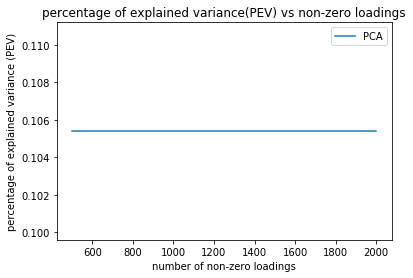

In [126]:
nonzero_load_v_PEV(n_loads,PCA_PEV)